Data shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


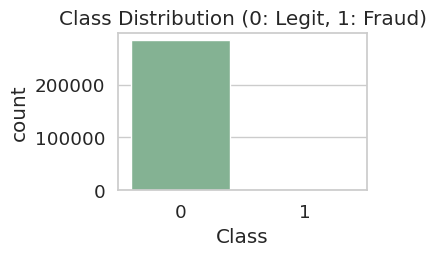

Fraudulent %: 0.173
After SMOTE: [213236 213236]
RandomForest trained.
XGBoost trained.
LogisticRegression trained.

RandomForest | Accuracy: 0.999 | ROC AUC: 0.969 | PR AUC: 0.849
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.80      0.82       123

    accuracy                           1.00     71202
   macro avg       0.92      0.90      0.91     71202
weighted avg       1.00      1.00      1.00     71202



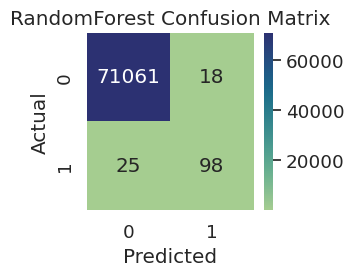

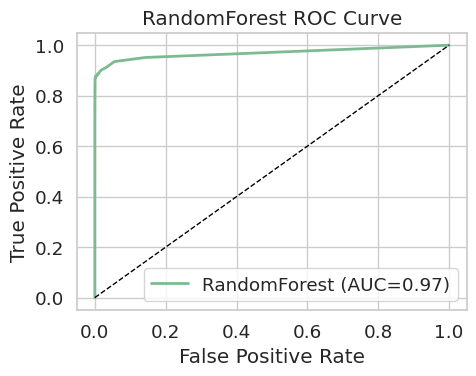

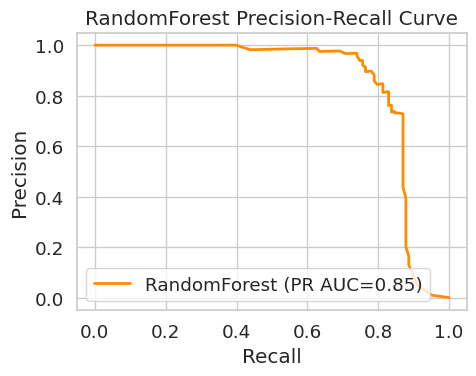


XGBoost | Accuracy: 0.999 | ROC AUC: 0.976 | PR AUC: 0.843
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.65      0.85      0.73       123

    accuracy                           1.00     71202
   macro avg       0.82      0.92      0.87     71202
weighted avg       1.00      1.00      1.00     71202



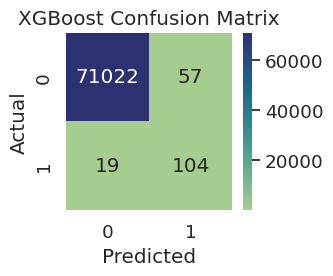

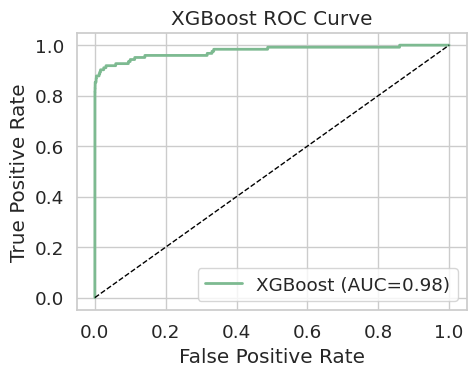

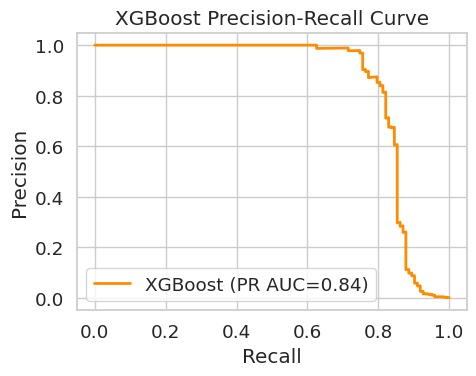


LogisticRegression | Accuracy: 0.976 | ROC AUC: 0.972 | PR AUC: 0.711
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202



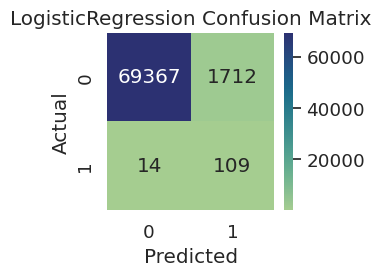

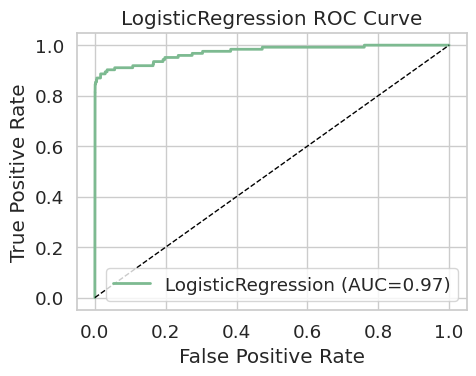

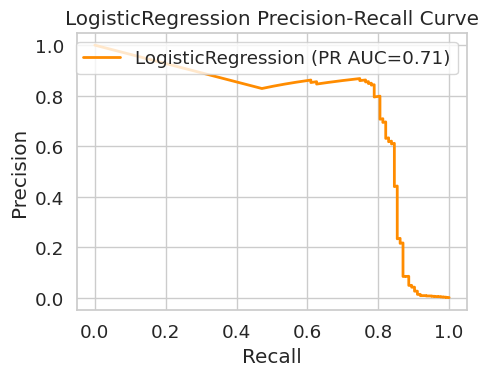

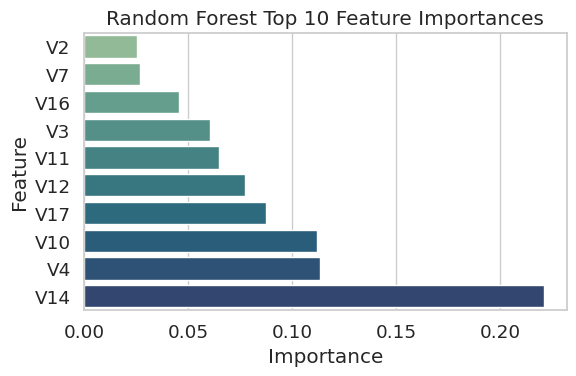

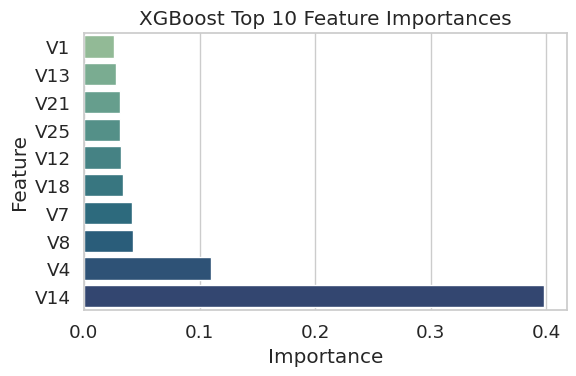

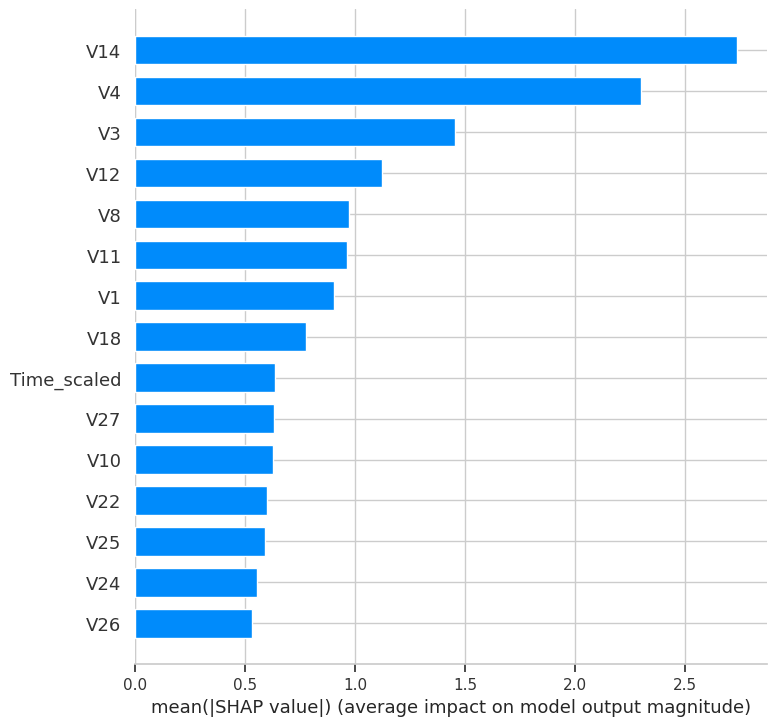


How to Use:
-----------
- This notebook automatically downloads the latest Kaggle credit card fraud dataset via KaggleHub.
- Performs robust fraud classification using classic ML (RF, XGBoost, Logistic Regression).
- Handles class imbalance with SMOTE; business metrics (ROC, PR AUC).
- Feature importance and SHAP for explainability.
- Swap in your own dataset for any fraud/anomaly/rare-event prediction use case.

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
"""
Credit Card Fraud Detection Pipeline
Classical ML with robust imbalanced handling, explainable metrics, and business-quality visualizations.
(Data auto-downloaded using KaggleHub)

Author: Rhishi Kumar Ayyappan
"""

# --- 1. Setup and Imports ---
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, roc_curve, auc, precision_recall_curve,
                             classification_report, accuracy_score, average_precision_score)
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid", palette="crest", font_scale=1.2)

# --- 2. Dataset Download & Loading ---
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
csv_path = os.path.join(path, "creditcard.csv")
df = pd.read_csv(csv_path)
print("Data shape:", df.shape)
display(df.head())

# --- 3. Data Preprocessing ---
target_col = "Class"

# Scaling 'Amount' and 'Time'
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# --- 4. EDA (Class Imbalance) ---
plt.figure(figsize=(4,2.8))
sns.countplot(x=target_col, data=df)
plt.title("Class Distribution (0: Legit, 1: Fraud)")
plt.tight_layout()
plt.show()
print("Fraudulent %: {:.3f}".format(100*df[target_col].mean()))

# --- 5. Train/Test Split ---
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=42
)

# --- 6. SMOTE Oversampling for Imbalanced Data ---
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print("After SMOTE:", np.bincount(y_res))

# --- 7. Model Training (RF, XGB, Logistic Regression) ---
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=10, random_state=42),
    "LogisticRegression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
}
for name, model in models.items():
    model.fit(X_res, y_res)
    print(f"{name} trained.")

# --- 8. Evaluation Function ---
def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, y_pred)
    pr_auc = average_precision_score(y_test, y_proba)
    roc_auc = auc(*roc_curve(y_test, y_proba)[:2])
    print(f"\n{name} | Accuracy: {acc:.3f} | ROC AUC: {roc_auc:.3f} | PR AUC: {pr_auc:.3f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(3.5, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="crest")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})", lw=2)
    plt.plot([0,1],[0,1],'k--', lw=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(5,4))
    plt.plot(recall, precision, label=f"{name} (PR AUC={pr_auc:.2f})", color="darkorange", lw=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{name} Precision-Recall Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- 9. Evaluate All Models ---
for name, model in models.items():
    evaluate(model, X_test, y_test, name)

# --- 10. Feature Importance (RF & XGB) ---
def plot_importance(model, X, name, top_n=10):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[-top_n:]
        plt.figure(figsize=(6,4))
        sns.barplot(x=importances[indices], y=X.columns[indices], palette="crest")
        plt.title(f"{name} Top {top_n} Feature Importances")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()
plot_importance(models["RandomForest"], X, "Random Forest")
plot_importance(models["XGBoost"], X, "XGBoost")

# --- 11. (Optional) Explainability: SHAP for XGBoost ---
try:
    import shap
    explainer = shap.TreeExplainer(models["XGBoost"])
    shap_values = explainer.shap_values(X_test)
    plt.title("XGBoost SHAP Summary Plot")
    shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=15, show=False)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("SHAP skipped:", e)

# --- 12. Usage Notes for Portfolio/README ---
usage = """
How to Use:
-----------
- This notebook automatically downloads the latest Kaggle credit card fraud dataset via KaggleHub.
- Performs robust fraud classification using classic ML (RF, XGBoost, Logistic Regression).
- Handles class imbalance with SMOTE; business metrics (ROC, PR AUC).
- Feature importance and SHAP for explainability.
- Swap in your own dataset for any fraud/anomaly/rare-event prediction use case.
"""
print(usage)
